In [36]:
from  ctapipe.io import EventSource
from traitlets.config import Config
from ctapipe.image import ImageProcessor
from ctapipe.image.muon import MuonProcessor
from ctapipe.calib import CameraCalibrator
import numpy as np
import matplotlib.pyplot as plt
from ctapipe.visualization import CameraDisplay

## Preparing events for further processing

In [49]:
intensity_cut = 0.3
counter = 0
event_container = {}


muon_processor_config = Config({"MuonProcessor": 
                                {"RingQuery": 
                                 {"quality_criteria" : [["intensity_check",f"np.abs(parameters.intensity_ratio - 1) < {intensity_cut}"],
                                                        ["ring_containment", "parameters.containment > 0.5"],
                                                        ["ring_completeness", "parameters.completeness > 0.5"]]}}})

image_processor = ImageProcessor(source.subarray)
muon_processor = MuonProcessor(source.subarray, config = muon_processor_config)
calib = CameraCalibrator(image_extractor_type="GlobalPeakWindowSum",subarray = source.subarray)

for run in range(0,1):
    filename = f'/Users/vdk/simulations/corsika_theta_30.390_az_93.640_run49{run}.simtel.gz'
    source = EventSource(filename)
    event_iterator = iter(source)

    for i,event in enumerate(event_iterator):
        #calib(event)
        #image_processor(event)
        #muon_processor(event)
        
        #print(event.simulation.tel[2].true_image.shape)
        print(event.trigger.tels_with_trigger)
        if not np.isnan(event.muon.tel[1].efficiency.width):
            event_container[run*1000+i] = event

TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


[1]
[1]
[1 3]
[2]
[1]
[1]
[1]
[1]
[1 3]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1 3]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[2]
[1]
[1]
[3]
[1 3]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[2]
[1]
[1]
[3]
[3]
[1]
[1]
[1 3]
[1]
[1 2]
[1 2 3]
[1]
[1]
[1]
[1]
[1 2 3]
[1]
[1 2 3]
[1]
[1]
[1]
[1 3]
[1]
[1]
[1]
[1]
[1 2]
[1]
[1]
[1]
[1 2 3]
[1 3]
[1]
[1]
[1]
[1]
[1 3]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1 2 3]
[1]
[1]
[1 2]
[1 2 3]
[1 2]
[1 2 3]
[2 3]
[1]
[1]
[1]
[1]
[1 3]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[2]
[1 2 3]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1 2 3]
[1]
[1]
[1 2 3]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1 3]
[1]
[1]
[1]
[1 3]
[1]
[1]
[1]
[1]
[1]
[3]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1 2]
[1]
[1]
[1]
[1]
[1]
[1 3]
[1]
[1]
[1]
[2]
[1]
[1]
[1]
[1 3]
[1]
[1]
[1]
[1]
[2]
[1 2]
[1]
[1]
[1]
[1 2 3]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1 2 3]
[1]
[1 2]
[1 2 3]
[1]
[1 3]
[1 3]
[1 2]
[1]
[1]
[1]
[1]


In [31]:
print(event_container[list(event_container.keys())[1]].muon.tel[1].efficiency)

{'impact': <Quantity 0.00090924 m>,
 'impact_x': <Quantity 0.00088819 m>,
 'impact_y': <Quantity -0.00019453 m>,
 'optical_efficiency': 0.20863044503616113,
 'width': <Quantity 0.06189115 deg>}


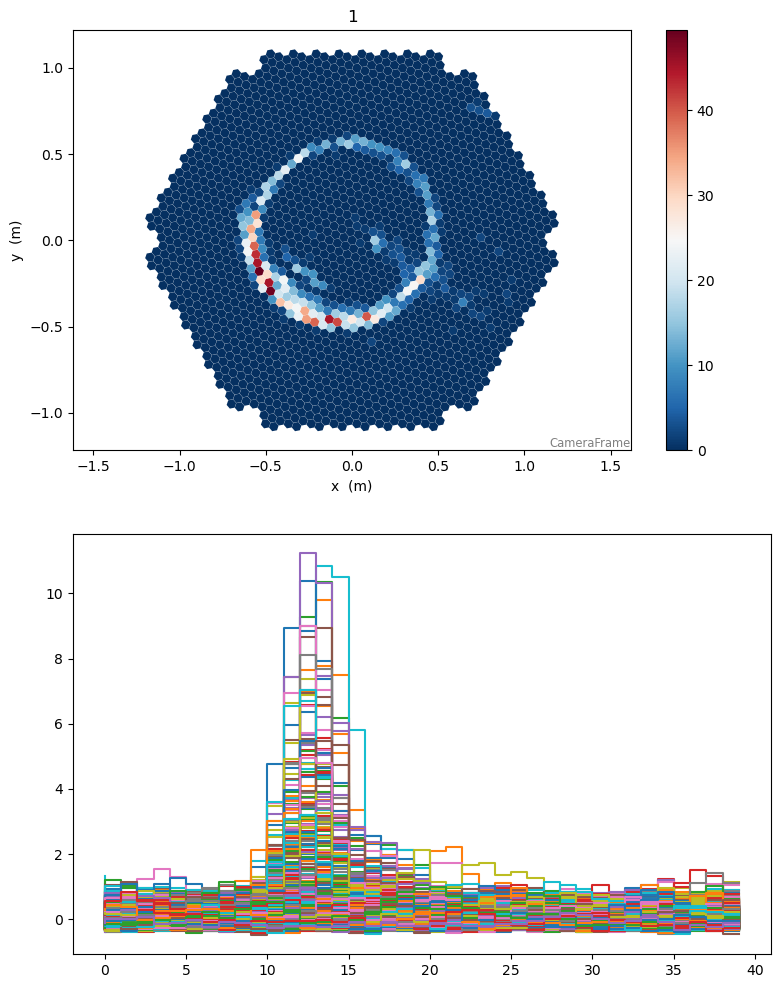

In [41]:
eventik = event_container[list(event_container.keys())[0]]
j = eventik
teln = 1
fig, axes = plt.subplots(2, 1, sharex=False, gridspec_kw={'height_ratios': [1, 1]}, figsize=(9,12))
fig.subplots_adjust(hspace=0.2)
ax = axes[0]
camgeom = source.subarray.tel[1].camera.geometry
#title=f"event{event_number}_fit{round(j.muon.tel[teln].efficiency.optical_efficiency,3)}_width{round(j.muon.tel[teln].efficiency.width.to_value(),3)}"
title =1 
disp = CameraDisplay(camgeom,title=title, ax = ax)
#disp.image = event.r1.tel[teln].waveform[:,11]
#disp.image = event.dl0.tel[teln].waveform[:,11]
disp.image = j.simulation.tel[teln].true_image #.sum(axis=1)
disp.cmap = plt.cm.RdBu_r
disp.add_colorbar()
disp.set_limits_percent(95)
bx = axes[1]
for pix_id in range(0,1855):
    #bx.plot(j.r0.tel[teln].waveform[0][pix_id], label="pix {}".format(pix_id), drawstyle='steps')
    bx.plot(j.r1.tel[teln].waveform[pix_id], label="pix {}".format(pix_id), drawstyle='steps')

## Timesample of muon rings and protons

### Real Data

In [1]:
filename = '/fefs/aswg/data/real/R0/20231007/LST-1.2.Run14948.0001.fits.fz'
# cfg = Config({
#     "source_config": {
#         "EventSource" : {
#             "allowed_tels": [1],"max_events": 99999}},
#         "PointingSource":{
#             "drive_report_path": '/fefs/onsite/monitoring/driveLST1/DrivePositioning/DrivePosition_log_20231005.txt'},
#         "LSTR0Corrections": {
#           "calib_scale_high_gain":1.088,
#           "calib_scale_low_gain":1.004,
#           "drs4_pedestal_path": '/fefs/aswg/data/real/monitoring/PixelCalibration/Cat-A/drs4_baseline/20231005/v0.10.2/drs4_pedestal.Run14905.0000.h5',
#           "calibration_path": '/fefs/aswg/data/real/monitoring/PixelCalibration/Cat-A/calibration/20231005/pro/calibration_filters_52.Run14906.0000.h5',
#           "drs4_time_calibration_path": '/fefs/aswg/data/real/monitoring/PixelCalibration/Cat-A/drs4_time_sampling_from_FF/20220518/v0.10.0/time_calibration.Run08349.0000.h5'
#       }})

source_cfg = Config({
    "source_config": {
        "EventSource" : {
            "allowed_tels": [1],"max_events": 9999}},
        "PointingSource":{
            "drive_report_path": '/fefs/onsite/monitoring/driveLST1/DrivePositioning/DrivePosition_log_20231007.txt'},
        "LSTR0Corrections": {
          "calib_scale_high_gain":1.088,
          "calib_scale_low_gain":1.004,
          "drs4_pedestal_path": '/fefs/aswg/data/real/monitoring/PixelCalibration/Cat-A/drs4_baseline/20231007/v0.10.2/drs4_pedestal.Run14937.0000.h5',
          "calibration_path": '/fefs/aswg/data/real/monitoring/PixelCalibration/Cat-A/calibration/20231007/v0.10.4/calibration_filters_52.Run14938.0000.h5',
          "drs4_time_calibration_path": '/fefs/aswg/data/real/monitoring/PixelCalibration/Cat-A/drs4_time_sampling_from_FF/20220518/v0.10.0/time_calibration.Run08349.0000.h5'
      }})

source = EventSource(filename, max_events=10, config = source_cfg)
event_iterator = iter(source)

NameError: name 'Config' is not defined

In [2]:
event = next(event_iterator)

NameError: name 'event_iterator' is not defined

In [3]:
for pix_id in range(0,1855):
    #bx.plot(j.r0.tel[xteln].waveform[0][pix_id], label="pix {}".format(pix_id), drawstyle='steps')
    plt.plot(event.r1.tel[1].waveform[pix_id], label="pix {}".format(pix_id), drawstyle='steps')

NameError: name 'plt' is not defined

## R1 max amplitude distribution

### Real Data

### Simulations

In [8]:
counter

4088

## Variances for muons and protons